In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np

data = pd.read_json(path_or_buf='logins.json')
data = data.astype(datetime)
data = data.set_index(pd.DatetimeIndex(data['login_time']))
data.login_time=1

In [2]:
min15 = data.groupby(pd.Grouper(freq='15Min')).apply(np.sum)
min15 = min15.rename(columns={'login_time':'Count'})
min15 = min15[min15.Count!=0]

min15.index=min15.index.hour.map(int)
min15.index=min15.index.map(str)
min15.describe()

,Count
count,9381.000000
mean,9.928792
std,8.263146
min,1.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,73.000000


In [3]:
day1 = data.groupby(pd.Grouper(freq='1D')).apply(np.sum)
day1 = day1.rename(columns={'login_time':'Count'})
day1.describe()
day1[day1.Count== int(day1.max())]

l=[]
for i in day1.index:
    d = i.isoweekday()
    l.append(d)
    
weekdays = pd.DataFrame(day1.Count.values,index=l,columns=['Count'])
weekdays.index=weekdays.index.map(str)

In [4]:
day7 = data.groupby(pd.Grouper(freq='7D')).apply(np.sum)
day7 = day7.rename(columns={'login_time':'Count'})
day7.describe()
day7[day7.Count== int(day7.max())]

,Count
login_time,
1970-03-12 20:12:16,9122


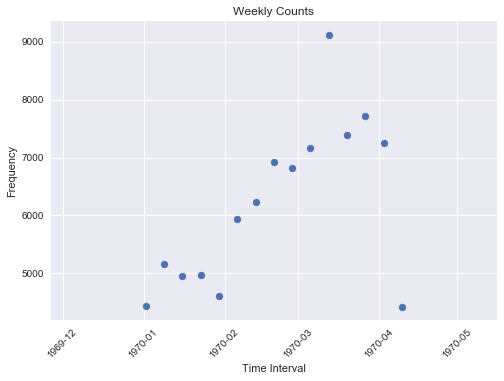

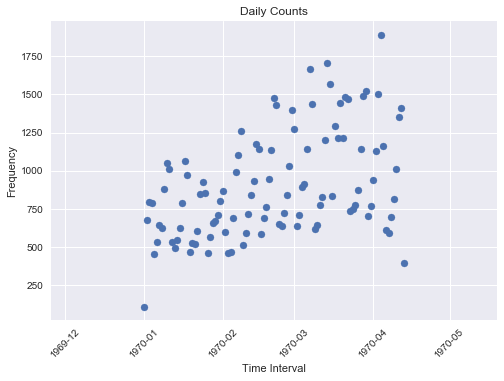

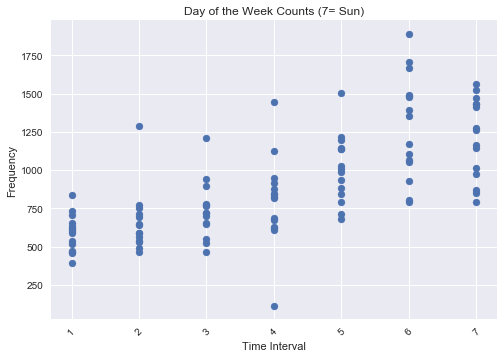

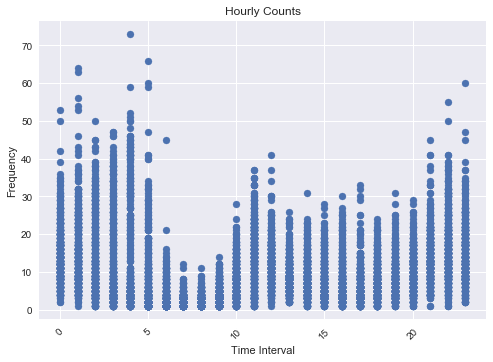

In [5]:
titles= ['Weekly Counts','Daily Counts','Day of the Week Counts (7= Sun)',
         'Hourly Counts']
for i,t in zip([day7,day1,weekdays,min15],titles):
    plt.scatter(i.index,i.Count)
    plt.xticks(rotation=45)
    plt.title(t)
    plt.ylabel('Frequency')
    plt.xlabel('Time Interval')
    plt.show()